# Different types of data

+ <u>Cross-sectional data</u> -
    Cross-sectional data or cross-section of a population is obtained by taking
    observations from multiple individuals at the same point in time.


+ <u>Time series data</u>-
    A time series is made up of quantitative observations on
    one or more measurable characteristics of an individual entity and taken at
    multiple points in time.
    
    
+ <u>Panel data</u>-
  If we observe multiple entities over multiple
  points in time we get a panel data also known as longitudinal data.


# Dataset

               Nifty50 data from 1-04-2010 to 1-04-2018
            

https://www.nseindia.com/products/content/equities/indices/historical_index_data.htm


+ Here we have Nifty50 data for years 2010 to 2018

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
Nifty_data=pd.read_csv("E:/summer/NIFTY50.csv",parse_dates=['Date'],index_col=['Date'])

In [28]:
#adding a new column for years
Nifty_data['year']=Nifty_data.index.map(lambda x:x.year)

In [29]:
#adding a new column for months
Nifty_data['month']=Nifty_data.index.map(lambda x:x.month)

In [30]:
Nifty_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1987 entries, 2010-04-01 to 2018-03-28
Data columns (total 8 columns):
Open                 1987 non-null float64
High                 1987 non-null float64
Low                  1987 non-null float64
Close                1987 non-null float64
Shares Traded        1987 non-null int64
Turnover (Rs. Cr)    1987 non-null float64
year                 1987 non-null int64
month                1987 non-null int64
dtypes: float64(5), int64(3)
memory usage: 139.7 KB


### We do not have Null values

In [31]:
Nifty_data.head()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),year,month
Date,,,,,,,,
2010-04-01,5249.20,5298.60,5249.20,5290.50,127773261,5365.11,2010,4
2010-04-05,5291.40,5377.55,5291.40,5368.40,132419861,5762.97,2010,4
2010-04-06,5369.65,5388.65,5351.70,5366.00,147051901,5746.95,2010,4
2010-04-07,5365.70,5399.65,5345.05,5374.65,166790249,6530.95,2010,4
2010-04-08,5376.30,5383.65,5290.25,5304.45,156785881,5830.63,2010,4


## Internal structures of time series

  A time series can be expressed as $x_t = f_t + s_t + c_t + e_t,$ which is a sum of the trend, seasonal, cyclical, and irregular components in that
  order.Here, t is the time index at which observations about the series have been
taken at t = 1,2,3 ...N successive and equally spaced points in time.

  + ***<u>General trend</u>***
   When a time series exhibits an upward or downward movement in the long run,
it is said to have a general trend.

+ ***<u>Seasonality***</u>
  Seasonality manifests as repetitive and period variations in a time series. In most
  cases, exploratory data analysis reveals the presence of seasonality.


+ ***<u>Cyclical movements***</u>
  Cyclical changes are movements observed after every few units of time, but they
occur less frequently than seasonal fluctuations. Unlike seasonality, cyclical
changes might not have a fixed period of variations.


+ ***<u>Unexpected variations***</u>
  This
fourth component reflects unexpected variations in the time series. Unexpected
variations are stochastic and cannot be framed in a mathematical model for a
definitive future prediction. This type of error is due to lack of information about
explanatory variables that can model these variations or due to presence of a
random noise.

#### Plotting of Nifty50 data to visualize some aspects

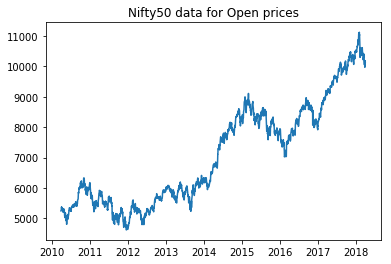

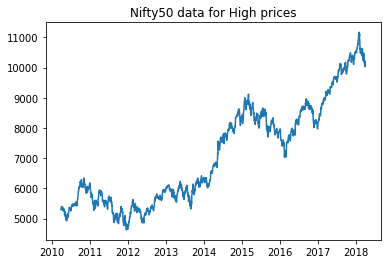

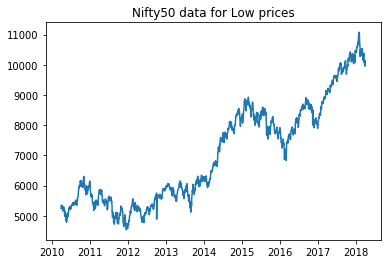

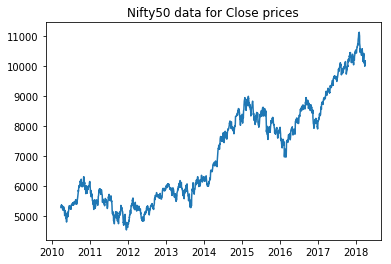

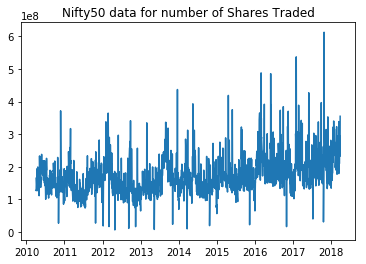

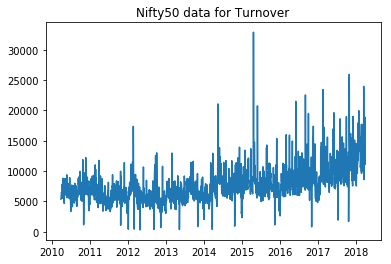

In [32]:
plt.plot(Nifty_data[['Open']])
plt.title('Nifty50 data for Open prices')
plt.show()
plt.plot(Nifty_data[['High']])
plt.title('Nifty50 data for High prices')
plt.show()
plt.plot(Nifty_data[['Low']])
plt.title('Nifty50 data for Low prices')
plt.show()
plt.plot(Nifty_data[['Close']])
plt.title('Nifty50 data for Close prices')
plt.show()
plt.plot(Nifty_data[['Shares Traded']])
plt.title('Nifty50 data for number of Shares Traded')
plt.show()
plt.plot(Nifty_data[['Turnover (Rs. Cr)']])
plt.title('Nifty50 data for Turnover')
plt.show()

##### As we can see there see there General trend is present in our data
#### To detrend the data,we will use use Linear regression.

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
# fitting trend model
trend_model_Close = LinearRegression(normalize=True, fit_intercept=True)
trend_model_Close.fit(np.arange(np.array(len(Nifty_data))).reshape((-1,1)), Nifty_data['Close'])
print('Trend model coefficient={} and intercept={}'.format(trend_model_Close.coef_[0],trend_model_Close.intercept_))

Trend model coefficient=2.6913413176792385 and intercept=4408.797165656242


Text(0,0.5,'Close prices')

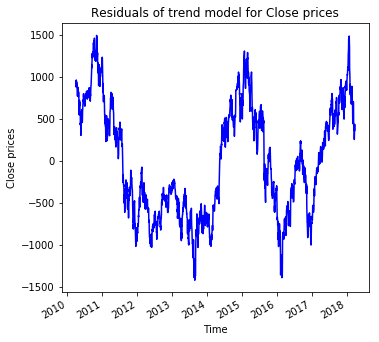

In [35]:
residuals_Close = np.array(Nifty_data['Close']) - trend_model_Close.predict(np.arange(np.array(len(Nifty_data))).reshape((-1,1)))
plt.figure(figsize=(5.5, 5.5))
pd.Series(data=residuals_Close, index=Nifty_data.index).plot(color='b')
plt.title('Residuals of trend model for Close prices')
plt.xlabel('Time')
plt.ylabel('Close prices')


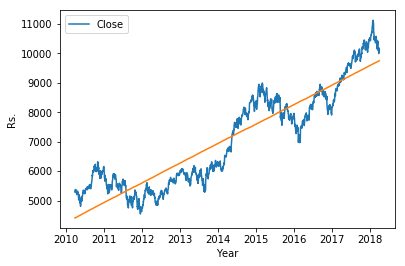

In [36]:
# plotting data with trend line
plt.plot(Nifty_data['Close'])
plt.plot(pd.Series(trend_model_Close.predict(np.arange(np.array(len(Nifty_data))).reshape((-1,1))),index=Nifty_data.index))
plt.xlabel('Year')
plt.ylabel('Rs.')
plt.legend()
plt.show()

In [37]:
# adding columns to dataset i.e. Residuals_close and Quarter 
Nifty_data['Residuals_Close'] = residuals_Close
month_quarter_map = {1: 'Q1', 2: 'Q1', 3: 'Q1',
                     4: 'Q2', 5: 'Q2', 6: 'Q2',
                     7: 'Q3', 8: 'Q3', 9: 'Q3',
                     10: 'Q4', 11: 'Q4', 12: 'Q4'
                    }
Nifty_data['Quarter'] = Nifty_data['month'].map(lambda m: month_quarter_map.get(m))

In [38]:
# Creating new subseries
seasonal_sub_series_Close = Nifty_data.groupby(by=['year', 'Quarter'])['Residuals_Close'].aggregate([np.mean, np.std])
seasonal_sub_series_Close.columns = ['Quarterly Mean Close', 'Quarterly Standard Deviation Close']

In [39]:
#Create row indices of seasonal_sub_series_data using Year & Quarter
seasonal_sub_series_Close.reset_index(inplace=True)
seasonal_sub_series_Close.index = seasonal_sub_series_Close['year'].astype(str) + '-' + seasonal_sub_series_Close['Quarter']
seasonal_sub_series_Close.head()

,year,Quarter,Quarterly Mean Close,Quarterly Standard Deviation Close
2010-Q2,2010,Q2,684.573634,160.825413
2010-Q3,2010,Q3,874.214640,188.131505
2010-Q4,2010,Q4,1201.765925,160.041830
2011-Q1,2011,Q1,565.246327,237.989246
2011-Q2,2011,Q2,411.484778,224.565694


## A practical technique of determining seasonality is through exploratory data
## analysis through the following plots:
1. Run sequence plot
2. Seasonal sub series plot
3. Multiple box plots

## Seasonal sub series plot
For a known periodicity of seasonal variations, seasonal sub series redraws the
original series over batches of successive time periods.
A seasonal sub series reveals two properties:
+ Variations within seasons as within a batch of successive months
+ Variations between seasons as between batches of successive months

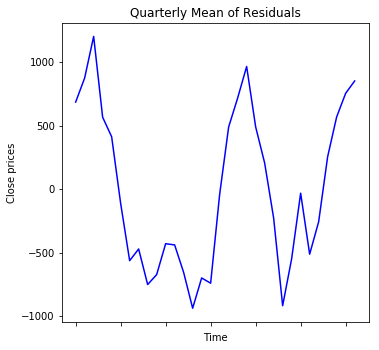

In [40]:
# Seasonal sub series plot
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_Close['Quarterly Mean Close'].plot(color='b')
plt.title('Quarterly Mean of Residuals')
plt.xlabel('Time')
plt.ylabel('Close prices')
plt.xticks(rotation=30)
plt.show()

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 9 Text xticklabel objects>)

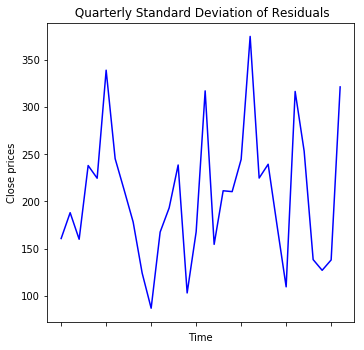

In [41]:
# Seasonal sub series plot
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_Close['Quarterly Standard Deviation Close'].plot(color='b')
plt.title(' Quarterly Standard Deviation of Residuals')
plt.xlabel('Time')
plt.ylabel('Close prices')
plt.xticks(rotation=30)

In [42]:
seasonal_sub_series_Close.head()

,year,Quarter,Quarterly Mean Close,Quarterly Standard Deviation Close
2010-Q2,2010,Q2,684.573634,160.825413
2010-Q3,2010,Q3,874.214640,188.131505
2010-Q4,2010,Q4,1201.765925,160.041830
2011-Q1,2011,Q1,565.246327,237.989246
2011-Q2,2011,Q2,411.484778,224.565694


# Multiple box plots
A box plot displays both
central tendency and dispersion within the seasonal data over a batch of time
units.Besides, separation between two adjacent box plots reveal the within season variations

Text(0,0.5,'Residuals_Close')

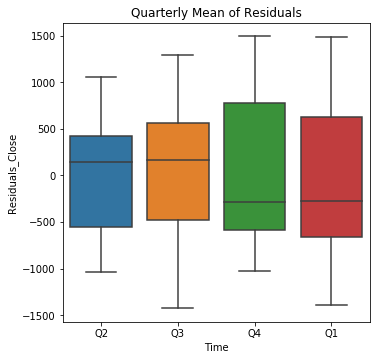

In [43]:
# Multiple Boxplot(Quarterly)
import seaborn as sns
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(data=Nifty_data[['Residuals_Close','Quarter']], y=Nifty_data['Residuals_Close'], x=Nifty_data['Quarter'])
g.set_title('Quarterly Mean of Residuals')
g.set_xlabel('Time')
g.set_ylabel('Residuals_Close')

Text(0,0.5,'Residuals_Close')

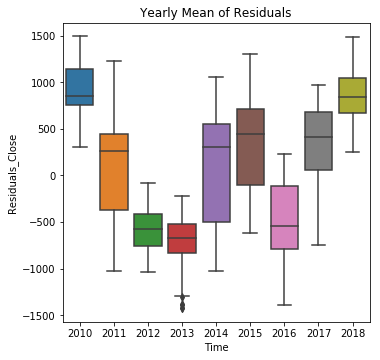

In [44]:
# Multiple Boxplot(Yearly)
import seaborn as sns
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(data=Nifty_data[['Residuals_Close','year']], y=Nifty_data['Residuals_Close'], x=Nifty_data['year'])
g.set_title('Yearly Mean of Residuals')
g.set_xlabel('Time')
g.set_ylabel('Residuals_Close')

Text(0,0.5,'Residuals_Close')

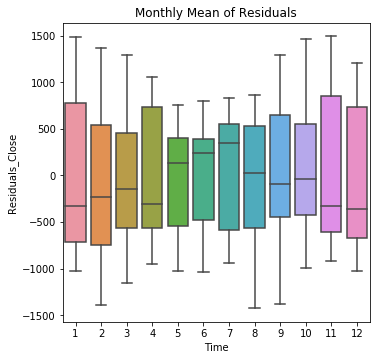

In [45]:
# Multiple Boxplot(Monthly)
import seaborn as sns
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(data=Nifty_data[['Residuals_Close','month']], y=Nifty_data['Residuals_Close'], x=Nifty_data['month'])
g.set_title('Monthly Mean of Residuals')
g.set_xlabel('Time')
g.set_ylabel('Residuals_Close')

In [46]:
seasonal_sub_series_Close.head()

,year,Quarter,Quarterly Mean Close,Quarterly Standard Deviation Close
2010-Q2,2010,Q2,684.573634,160.825413
2010-Q3,2010,Q3,874.214640,188.131505
2010-Q4,2010,Q4,1201.765925,160.041830
2011-Q1,2011,Q1,565.246327,237.989246
2011-Q2,2011,Q2,411.484778,224.565694


In [47]:
Nifty_data.head()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),year,month,Residuals_Close,Quarter
Date,,,,,,,,,,
2010-04-01,5249.20,5298.60,5249.20,5290.50,127773261,5365.11,2010,4,881.702834,Q2
2010-04-05,5291.40,5377.55,5291.40,5368.40,132419861,5762.97,2010,4,956.911493,Q2
2010-04-06,5369.65,5388.65,5351.70,5366.00,147051901,5746.95,2010,4,951.820152,Q2
2010-04-07,5365.70,5399.65,5345.05,5374.65,166790249,6530.95,2010,4,957.778810,Q2
2010-04-08,5376.30,5383.65,5290.25,5304.45,156785881,5830.63,2010,4,884.887469,Q2


## Run sequence plot
A simple run sequence plot of the original time series with time on x-axis and the
variable on y-axis is good for indicating the following properties of the time
series:
+ Movements in mean of the series
+ Shifts in variance
+ Presence of outliers

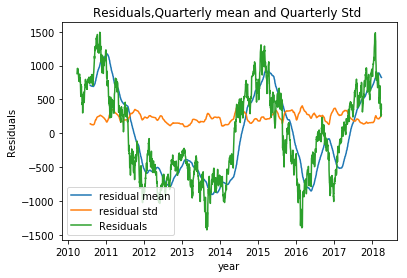

In [48]:
# Run sequence plot Quarterly
plt.plot(Nifty_data[['Residuals_Close']].rolling(window=90).mean(),label='residual mean')
plt.plot(Nifty_data[['Residuals_Close']].rolling(window=90).std(),label='residual std')
plt.plot(Nifty_data[['Residuals_Close']],label='Residuals')
plt.xlabel('year')
plt.ylabel('Residuals')
plt.title('Residuals,Quarterly mean and Quarterly Std ')
plt.legend()
plt.show()

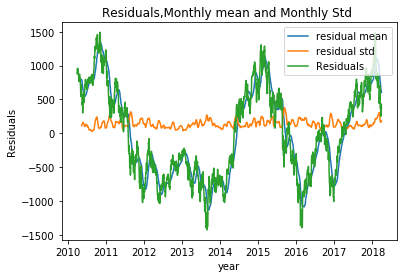

In [49]:
# Run sequence plot Monthly
plt.plot(Nifty_data[['Residuals_Close']].rolling(window=30).mean(),label='residual mean')
plt.plot(Nifty_data[['Residuals_Close']].rolling(window=30).std(),label='residual std')
plt.plot(Nifty_data[['Residuals_Close']],label='Residuals')
plt.xlabel('year')
plt.ylabel('Residuals')
plt.title('Residuals,Monthly mean and Monthly Std ')
plt.legend()
plt.show()

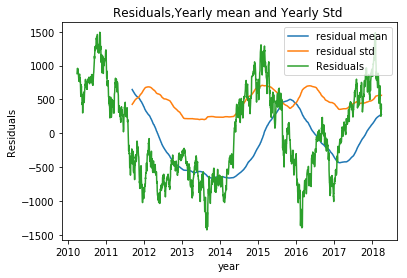

In [50]:
# Run sequence plot Yearly
plt.plot(Nifty_data[['Residuals_Close']].rolling(window=365).mean(),label='residual mean')
plt.plot(Nifty_data[['Residuals_Close']].rolling(window=365).std(),label='residual std')
plt.plot(Nifty_data[['Residuals_Close']],label='Residuals')
plt.xlabel('year')
plt.ylabel('Residuals')
plt.title('Residuals,Yearly mean and Yearly Std ')
plt.legend()
plt.show()